<a href="datacamp.com/workspacecompetition" target="_blank">![banner](banner.png)</a>

# Loan Data

Ready to put your coding skills to the test? Join us for our Workspace Competition.  
For more information, visit [datacamp.com/workspacecompetition](https://datacamp.com/workspacecompetition) 

## Context
This dataset ([source](https://www.kaggle.com/itssuru/loan-data)) consists of data from almost 10,000 borrowers that took loans - with some paid back and others still in progress. It was extracted from lendingclub.com which is an organization that connects borrowers with investors. We've included a few suggested questions at the end of this template to help you get started.

In [21]:
# installing dependencies (please wait)
!pip install imblearn
!pip install phik
!pip install treeinterpreter


  Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
  Using cached imbalanced_learn-0.8.0-py3-none-any.whl (206 kB)
  Using cached scipy-1.7.1-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.whl (28.4 MB)
  Using cached scikit_learn-0.24.2-cp38-cp38-manylinux2010_x86_64.whl (24.9 MB)
  Using cached numpy-1.21.2-cp38-cp38-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (15.8 MB)
  Using cached joblib-1.0.1-py3-none-any.whl (303 kB)
  Using cached threadpoolctl-2.2.0-py3-none-any.whl (12 kB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.4.1 requires numpy~=1.19.2, but you have numpy 1.21.2 which is incompatible.
tensorflow 2.4.1 requires six~=1.15.0, but you have six 1.16.0 which is incompatible.
pythonwhat 2.23.1 requires dill~=0.2.7.1, but you have dill 0.3.3 which is incompatible.
pythonwhat 2.23.1 requires jinja2~=2.10, but you have jinja

In [22]:
# Load packages
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from phik.report import plot_correlation_matrix
from phik import report
from sklearn.preprocessing import StandardScaler
import imblearn
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score



## Load your data

In [3]:
# Load data from the csv file
df = pd.read_csv('loan_data.csv', index_col=None)

# Change the dots in the column names to underscores
df.columns = [c.replace(".", "_") for c in df.columns]
print(f"Number of rows/records: {df.shape[0]}")
print(f"Number of columns/variables: {df.shape[1]}")
df.head()

Number of rows/records: 9578
Number of columns/variables: 14


,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


## Understand your variables

In [4]:
# Understand your variables
variables = pd.DataFrame(columns=['Variable','Number of unique values','Values'])

for i, var in enumerate(df.columns):
    variables.loc[i] = [var, df[var].nunique(), df[var].unique().tolist()]
    
# Join with the variables dataframe
var_dict = pd.read_csv('variable_explanation.csv', index_col=0)
variables.set_index('Variable').join(var_dict)

,Number of unique values,Values,Explanation
Variable,,,
credit_policy,2,"[1, 0]",1 if the customer meets the credit underwritin...
purpose,7,"[debt_consolidation, credit_card, all_other, h...",The purpose of the loan.
int_rate,249,"[0.1189, 0.1071, 0.1357, 0.1008, 0.1426, 0.078...",The interest rate of the loan (more risky borr...
installment,4788,"[829.1, 228.22, 366.86, 162.34, 102.92, 125.13...",The monthly installments owed by the borrower ...
log_annual_inc,1987,"[11.35040654, 11.08214255, 10.37349118, 11.299...",The natural log of the self-reported annual in...
dti,2529,"[19.48, 14.29, 11.63, 8.1, 14.97, 16.98, 4.0, ...",The debt-to-income ratio of the borrower (amou...
fico,44,"[737, 707, 682, 712, 667, 727, 722, 677, 662, ...",The FICO credit score of the borrower.
days_with_cr_line,2687,"[5639.958333, 2760.0, 4710.0, 2699.958333, 406...",The number of days the borrower has had a cred...
revol_bal,7869,"[28854, 33623, 3511, 33667, 4740, 50807, 3839,...",The borrower's revolving balance (amount unpai...


Now you can start to explore this dataset with the chance to win incredible prices! Can't think of where to start? Try your hand at these suggestions:

- Extract useful insights and visualize them in the most interesting way possible.
- Find out how long it takes for users to pay back their loan.
- Build a model that can predict the probability a user will be able to pay back their loan within a certain period.
- Find out what kind of people take a loan for what purposes.

## Main question: Which variables are most helpful to classify loan purpose categories?

### 1. Exploratory Data Analysis

#### 1.1. Data description

Here we check data types, null or invalid values and prepare the data for exploration.

In [5]:
# Start coding 
print('confirming this dataset has no null values by displaying the sum of all column\'s null values: '+str(df.isnull().sum().sum()))
print('let\'s display descritive statistics now:')
df.describe()

confirming this dataset has no null values by displaying the sum of all column's null values: 0
let's display descritive statistics now:


,credit_policy,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


Now that we know there are no null values, let's display data types for all columns

In [6]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit_policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int_rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log_annual_inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days_with_cr_line  9578 non-null   float64
 8   revol_bal          9578 non-null   int64  
 9   revol_util         9578 non-null   float64
 10  inq_last_6mths     9578 non-null   int64  
 11  delinq_2yrs        9578 non-null   int64  
 12  pub_rec            9578 non-null   int64  
 13  not_fully_paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


By looking at data types, we can also say that they are consistent, with only 1 column of object data type, which is the purpose column.
All integer columns are either binary (1, 0) or count, like "inq_last_6mths". Float columns are related to money or indexes/ratios.

#### 1.2. Data Visualization

Since our analysis is focused on the column "purpose", it is a good idea to see how well this data is distributed on each of the 7 categories using value_counts method and creating a histogram.

In [7]:
df['purpose'].value_counts().to_frame().style.bar()

,purpose
debt_consolidation,3957
all_other,2331
credit_card,1262
home_improvement,629
small_business,619
major_purchase,437
educational,343


The histogram shows that this dataset is unbalanced between the "purpose of loan" classes. It is important to keep that in mind as we go forward.
My next step is to visualize how is the distribuition of each of the other columns is against the purpose column. Let's start with a boxplot.

<AxesSubplot:xlabel='not_fully_paid', ylabel='purpose'>

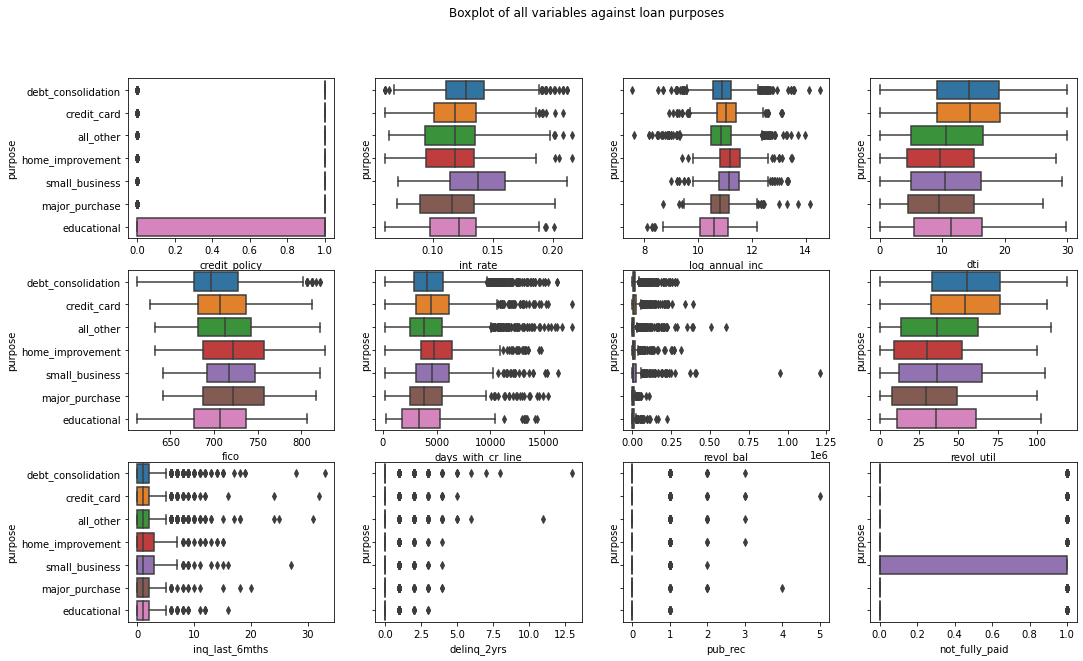

In [8]:

fig, axes = plt.subplots(3, 4, figsize=(17, 10),sharey=True)
  
fig.suptitle('Boxplot of all variables against loan purposes')



  
sns.boxplot(ax=axes[0, 0], data=df, x='credit_policy', y='purpose')
sns.boxplot(ax=axes[0, 1], data=df, x='int_rate', y='purpose')
sns.boxplot(ax=axes[0, 2], data=df, x='log_annual_inc', y='purpose')
sns.boxplot(ax=axes[0, 3], data=df, x='dti', y='purpose')
sns.boxplot(ax=axes[1, 0], data=df, x='fico', y='purpose')
sns.boxplot(ax=axes[1, 1], data=df, x='days_with_cr_line', y='purpose')
sns.boxplot(ax=axes[1, 2], data=df, x='revol_bal', y='purpose')
sns.boxplot(ax=axes[1, 3], data=df, x='revol_util', y='purpose')
sns.boxplot(ax=axes[2, 0], data=df, x='inq_last_6mths', y='purpose')
sns.boxplot(ax=axes[2, 1], data=df, x='delinq_2yrs', y='purpose')
sns.boxplot(ax=axes[2, 2], data=df, x='pub_rec', y='purpose')
sns.boxplot(ax=axes[2, 3], data=df, x='not_fully_paid', y='purpose')

<AxesSubplot:xlabel='not_fully_paid', ylabel='purpose'>

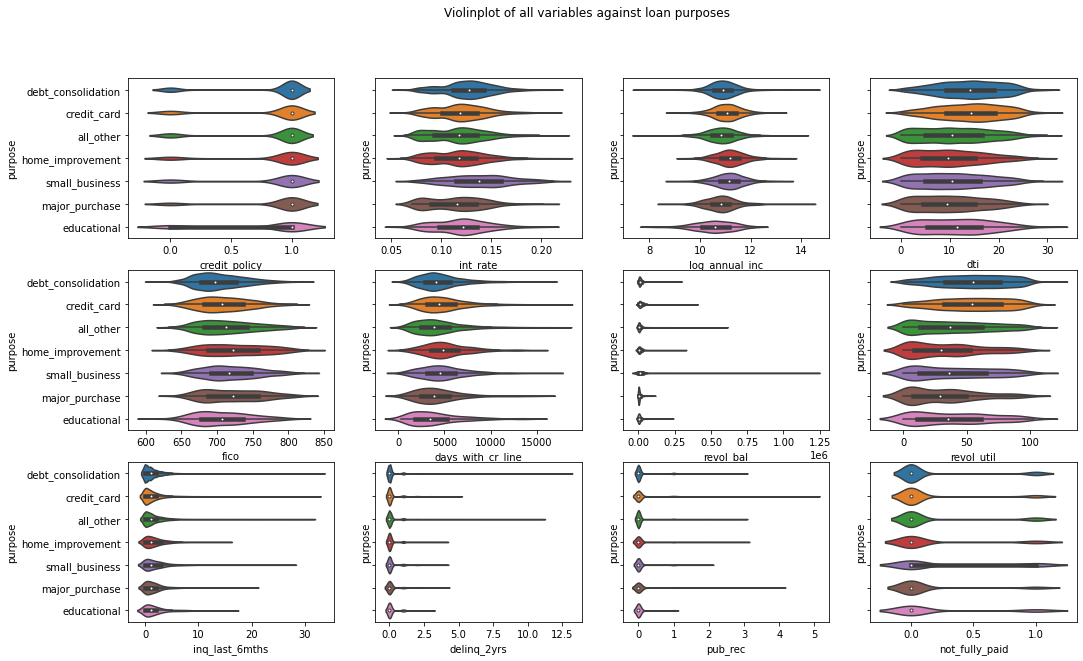

In [9]:

fig, axes = plt.subplots(3, 4, figsize=(17, 10),sharey=True)
  
fig.suptitle('Violinplot of all variables against loan purposes')



  
sns.violinplot(ax=axes[0, 0], data=df, x='credit_policy', y='purpose')
sns.violinplot(ax=axes[0, 1], data=df, x='int_rate', y='purpose')
sns.violinplot(ax=axes[0, 2], data=df, x='log_annual_inc', y='purpose')
sns.violinplot(ax=axes[0, 3], data=df, x='dti', y='purpose')
sns.violinplot(ax=axes[1, 0], data=df, x='fico', y='purpose')
sns.violinplot(ax=axes[1, 1], data=df, x='days_with_cr_line', y='purpose')
sns.violinplot(ax=axes[1, 2], data=df, x='revol_bal', y='purpose')
sns.violinplot(ax=axes[1, 3], data=df, x='revol_util', y='purpose')
sns.violinplot(ax=axes[2, 0], data=df, x='inq_last_6mths', y='purpose')
sns.violinplot(ax=axes[2, 1], data=df, x='delinq_2yrs', y='purpose')
sns.violinplot(ax=axes[2, 2], data=df, x='pub_rec', y='purpose')
sns.violinplot(ax=axes[2, 3], data=df, x='not_fully_paid', y='purpose')

With the boxplots, we can see there are a couple differences between groups and more obvious conclusions like: most of the loans with educational purposes meet the credit policy criteria, unlike all other categories, and more loans to small businesses are not paid than otherwise. However, since the data is unbalanced regarding the purpose of the loans, I will not jump to conclusions too fast.

Let's see how the variables interact, first with the pearson's correlation coeficient, which is looking for linear correlations.

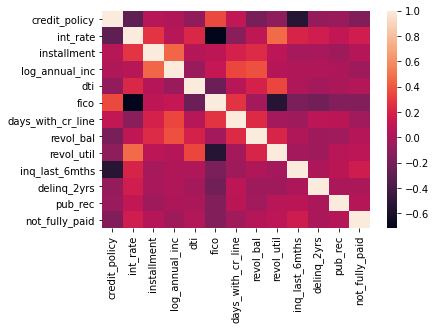

In [10]:
#creating heatmap
sns.heatmap(df.corr());

As we can see, there are the following negative correlations:
- FICO credit score and interest rate (the lower the score, the higher the interest rate)
- Compliance to Credit policy and number of inquiries in the last 6 months (if a loan is not compliant with credit policy, expect more inquiries)
- Revolving line utilization and FICO score

And also some significant positive correlations:
- Log of annual income and amount of the monthly installments, and also revolving balance.
- debt-to-income ration and revolving line utilization rate
- revolving line utilization rate and interest rate

All of it makes sense and can be useful later, but since our target variable, which is purpose of loan, is not a numeric one, we cannot verify correlation using Pearson's coefficient.

One solution to that is to use Phik($\phi_K$) coefficient

interval columns not set, guessing: ['credit_policy', 'int_rate', 'installment', 'log_annual_inc', 'dti', 'fico', 'days_with_cr_line', 'revol_bal', 'revol_util', 'inq_last_6mths', 'delinq_2yrs', 'pub_rec', 'not_fully_paid']


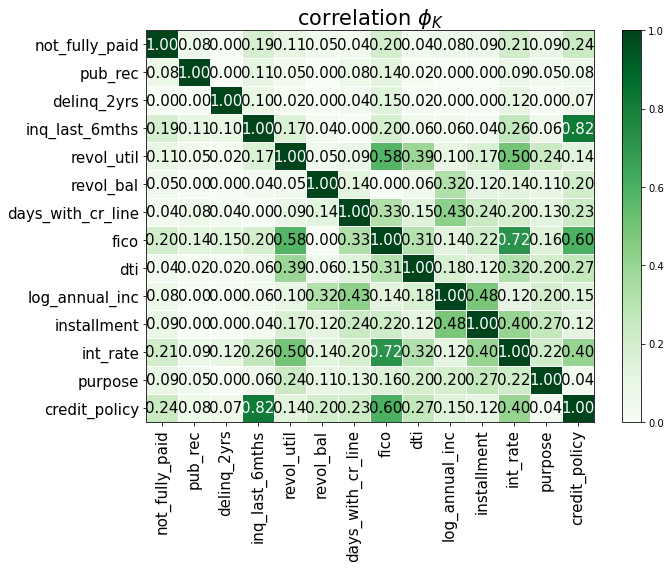

In [11]:
from phik.report import plot_correlation_matrix
from phik import report

phik_overview = df.phik_matrix()
plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="Greens", 
                        title=r"correlation $\phi_K$", 
                        fontsize_factor=1.5, 
                        figsize=(10, 8))
plt.tight_layout()

When we look for the purpose, the coefficients that show the highest values are: installment (value of monthly installments), revolving utilization rate and interest rate. Log of annual income and debt-to-income come following. 



#### 1.3. Data Standardization and PCA analysis

Now, let's use PCA and try to see if it suggests we could reduce variables for this analysis.
First, we will have to Standardize using sklearn's StandardScaler, but avoiding scaling the columns that have binary values.
In our case:
not_fully_paid and credit_policy

In [12]:
nonbinary = df.columns.values.tolist()
nonbinary.remove('not_fully_paid')
nonbinary.remove('credit_policy')
nonbinary

['purpose',
 'int_rate',
 'installment',
 'log_annual_inc',
 'dti',
 'fico',
 'days_with_cr_line',
 'revol_bal',
 'revol_util',
 'inq_last_6mths',
 'delinq_2yrs',
 'pub_rec']

In [13]:
std = StandardScaler()
X = df.drop('purpose',axis=1)
y = df[['purpose']].values
init_col_order = X.columns
nonbinary = X.columns.values.tolist()
binary = ['not_fully_paid','credit_policy']
nonbinary.remove('not_fully_paid')
nonbinary.remove('credit_policy')

X_nonbin_scaled = pd.DataFrame(std.fit_transform(X[nonbinary]),columns=nonbinary)
X_bin = X[binary]
X_scaled = pd.concat([X_nonbin_scaled, X_bin],axis=1)[init_col_order]



Resampling

Since the data is imbalanced, we have to resample it. 

In [15]:
ros = RandomOverSampler(random_state=0)
X_res, y_res = ros.fit_resample(X_scaled, y)
print('Resampled dataset shape %s' % Counter(y_res))


Resampled dataset shape Counter({'debt_consolidation': 3957, 'credit_card': 3957, 'all_other': 3957, 'home_improvement': 3957, 'small_business': 3957, 'major_purchase': 3957, 'educational': 3957})


Now we can apply PCA. I will plot the Scree Plot with percent of explained variance by each additional component and then a cumulative graph.

In [16]:
pca = PCA(random_state = 42)
X_pca = pca.fit_transform(X_res)

[Text(0.5, 0, 'Component'),
 Text(0, 0.5, 'Percent of Explained variance'),
 Text(0.5, 1.0, 'Scree Plot'),
 (0.0, 1.0)]

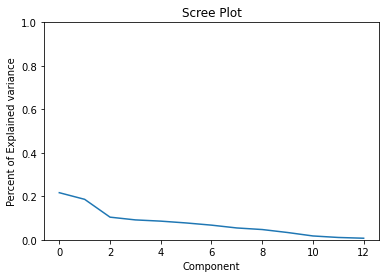

In [17]:
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(pca.explained_variance_ratio_)
ax.set(
        xlabel = "Component",
        ylabel = "Percent of Explained variance",
        title = "Scree Plot",
        ylim = (0,1),
)

[Text(0.5, 0, 'Component'),
 Text(0, 0.5, 'Cumulative Percentage of Explained variance'),
 Text(0.5, 1.0, 'Scree Plot')]

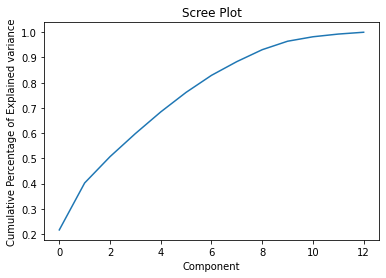

In [18]:
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

fig, ax = plt.subplots(figsize=(6,4))
ax.plot(cumulative_explained_variance)
ax.set(
        xlabel = "Component",
        ylabel = "Cumulative Percentage of Explained variance",
        title = "Scree Plot",
)



As we can see, we still need many components to explain the variance in our data. In fact, we still need 7-8 components to account for 90% of variance, which means our PCA will not provide enough information to be able to reduce the number of variables in our problem and further explore the relationships.

## 2. Machine Learning Model

One strategy that we can use is to select an algorithm with good classification performance and try to extract what are the features that are most useful in that task.

#### 2.1. Performance Metric

The first thing to do is to define a metric to evaluate the performance of the algorithms. Since our task is basically a multiple class classification, the choice is not trivial.

Specially because we have categories like all_other and debt_consolidation which are pretty generic, while home_improvement, educational which are more informative. Hence, a good suggestion is to use the F1 metric or the accuracy score.

The accuracy is simply the ratio which the test samples are correctly classified.

For simplification, I opted to use the accuracy score.

#### 2.1.1 Cross-Validation

Since I will test models of different complexity and the dataset is not particularly big and includes oversampling, it is a good idea to apply cross-validation to properly evaluate performance, use all data and reduce the risk of overfitting.

To perform Cross-Validation, I will use the cross_val_score from sklearn.

#### 2.2. Machine Learning Algorithms

For this task, I will use:
- Naive Bayes
- Logistic Regression
- Decition Tree Classifier
- Random Forest Classifier
- KNNeighbors Classifier
- Stochastic Gradient Descent

After deciding which one or two are the most useful, I will optimize the hyperparameters and explore their results. 

In [51]:
nbc = GaussianNB()
lgr = LogisticRegression(multi_class='auto')
dtc = DecisionTreeClassifier(random_state=0)
sgd = SGDClassifier(shuffle=True,random_state=0)
rfc = RandomForestClassifier(n_estimators=10,random_state=0)
knn = KNeighborsClassifier()

classifiers = [nbc, lgr, dtc, sgd, rfc, knn]
score = {}
for classifier in classifiers:
    score[str(classifier)] = np.mean(cross_val_score(classifier, X_res, y_res, cv=10, scoring='accuracy'))



In [52]:
algoresults = pd.DataFrame.from_dict(score,orient='index',columns=['Accuracy'])
algoresults

,Accuracy
GaussianNB(),0.239140
LogisticRegression(),0.294197
DecisionTreeClassifier(random_state=0),0.887108
SGDClassifier(random_state=0),0.231452
"RandomForestClassifier(n_estimators=10, random_state=0)",0.899851
KNeighborsClassifier(),0.758115


As we can see, the Random Forest and Decision Tree classifiers presented good results, followed by KNeighbors. All algorithms have hyperparameters that can be tuned for better performance. Let's try this using Grid Search Cross-Validation.

#### 2.3. Hyperparameter tuning

Let's start with our algorithm of higher score.

In [26]:

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size= 0.2, random_state = 1)


# Create the parameter grid based on the results of random search 
param_grid = {

    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [8, 10, 12],

}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)


# Fit the grid search to the data
grid_search.fit(X_res, y_res)
grid_search.best_params_





Fitting 3 folds for each of 9 candidates, totalling 27 fits


{'min_samples_leaf': 1, 'min_samples_split': 8}

In [27]:
grid_search.best_params_

{'min_samples_leaf': 1, 'min_samples_split': 8}

In [28]:
score['RandomForestClassifier GridSearchCV'] = np.mean(cross_val_score(RandomForestClassifier(n_estimators=100,max_depth=100,min_samples_leaf=1,min_samples_split=8,random_state=0), X_res, y_res, cv=10, scoring='accuracy'))

In [29]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [10, 20, 30, 50, 100],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [8, 10, 12]
}
# Create a based model
dtc = DecisionTreeClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)


# Fit the grid search to the data
grid_search.fit(X_res, y_res)
grid_search.best_params_

Fitting 3 folds for each of 45 candidates, totalling 135 fits


{'max_depth': 50, 'min_samples_leaf': 1, 'min_samples_split': 8}

In [30]:
score['Decision Tree Classifier GridSearchCV'] = np.mean(cross_val_score(DecisionTreeClassifier(max_depth=100,min_samples_leaf=1,min_samples_split=8,random_state=0), X_res, y_res, cv=10, scoring='accuracy'))

In [31]:
score

{'GaussianNB()': 0.23914005368879013,
 'LogisticRegression()': 0.2941965651168885,
 'DecisionTreeClassifier(random_state=0)': 0.8871083801708706,
 'SGDClassifier(random_state=0)': 0.23145173549861603,
 'RandomForestClassifier(n_estimators=10, random_state=0)': 0.8998514888274384,
 'KNeighborsClassifier(n_neighbors=10)': 0.640384452414757,
 'RandomForestClassifier GridSearchCV': 0.9082632367378389,
 'Decision Tree Classifier GridSearchCV': 0.8502114305754921}

Given that the RandomForestClassifier presented the highest accuracy, we can explore the classifier coefficients to understand what are the most important variables.

In [32]:
rfc = RandomForestClassifier(n_estimators=100,max_depth=100,min_samples_leaf=1,min_samples_split=8,random_state=0).fit(X_train,y_train)

pd.DataFrame({'Variable':X_train.columns,
              'Importance':rfc.feature_importances_}).sort_values('Importance', ascending=False).style.bar()

,Variable,Importance
2,installment,0.128248
7,revol_bal,0.121554
3,log_annual_inc,0.117115
1,int_rate,0.112969
6,days_with_cr_line,0.112559
4,dti,0.110344
8,revol_util,0.110075
5,fico,0.090410
9,inq_last_6mths,0.051126
10,delinq_2yrs,0.013902


Here we see that there are 7 columns with similar importance, from installment to dti, with an 8th not too far behind. 
This is an interesting coincidence with the PCA results.

I would suggest that we drop the last 4 columns, delinq_2yrs, not_fully_paid, credit_policy and pub_rec and try the analysis again. This time with a simpler algorithm, the DecisionTreeClassifier, that will enable us better visualizations in comparison to the other options.

#### 2.4. Reaplying GridSearch CV to tune Hyperparameters for Decision Tree Classifier

In [33]:
X_res_filtered = X_res.drop(columns=['delinq_2yrs','not_fully_paid','credit_policy','pub_rec'])

In [34]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [8, 10, 12]
}
# Create a based model
dtc = DecisionTreeClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)


# Fit the grid search to the data
grid_search.fit(X_res_filtered, y_res)
grid_search.best_params_

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] END ............min_samples_leaf=1, min_samples_split=8; total time=   4.9s
[CV] END ...........min_samples_leaf=1, min_samples_split=10; total time=   4.8s
[CV] END ...........min_samples_leaf=1, min_samples_split=10; total time=   5.0s
[CV] END ...........min_samples_leaf=1, min_samples_split=12; total time=   5.3s
[CV] END ............min_samples_leaf=2, min_samples_split=8; total time=   5.5s
[CV] END ............min_samples_leaf=2, min_samples_split=8; total time=   5.4s
[CV] END ...........min_samples_leaf=2, min_samples_split=10; total time=   4.7s
[CV] END ...........min_samples_leaf=2, min_samples_split=12; total time=   4.6s
[CV] END ...........min_samples_leaf=2, min_samples_split=12; total time=   4.8s
[CV] END ............min_samples_leaf=4, min_samples_split=8; total time=   4.8s
[CV] END ...........min_samples_leaf=4, min_samples_split=10; total time=   4.6s
[CV] END ...........min_samples_leaf=4, min_samp

{'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 8}

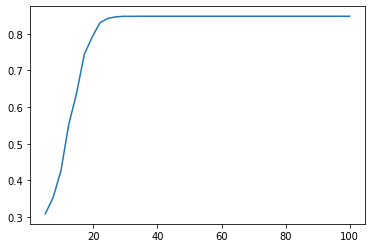

In [36]:
#Creating the visualization
x = np.linspace(5,100, num=40)
y = []
for i in x:
    y.append(np.mean(cross_val_score(DecisionTreeClassifier(max_depth=i,min_samples_leaf=1,min_samples_split=8,random_state=0), 
                                     X_res_filtered, y_res, cv=10, scoring='accuracy')))

fig, ax = plt.subplots(figsize=(6,4))
ax.plot(x,y)

Now, let's create a plot of depth between 1 and 30

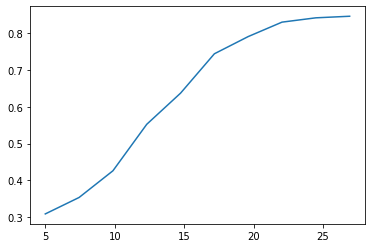

In [40]:
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(x[0:10],y[0:10])

Here we can see that the accuracy increases with the depth of the tree. However, the slope stabilizes around the depth 25, where the accuracy is very close to the value when the depth is 100.

Let's take a look at the feature importance of the new Decision Tree Classifier model, with max_depth parameter of 25. 


In [42]:
dtc = DecisionTreeClassifier(max_depth=25,min_samples_leaf=1,min_samples_split=8,random_state=0).fit(X_res_filtered,y_res)

pd.DataFrame({'Variable':X_res_filtered.columns,
              'Importance':dtc.feature_importances_}).sort_values('Importance', ascending=False).style.bar()

,Variable,Importance
6,revol_bal,0.139598
1,installment,0.133347
2,log_annual_inc,0.123719
7,revol_util,0.119911
3,dti,0.119809
5,days_with_cr_line,0.118364
0,int_rate,0.105151
4,fico,0.090584
8,inq_last_6mths,0.049518


Here, we can see slightly bigger differences, but the top three remains the same of the RandomForestClassifier of the first analysis.

This is indicates that revol_bal, installment and log_annual_inc are the top 3 variables to determine the purpose of the loan.
Not curiously, installment and log_annual_inc are amongst the top variables in terms of correlation with purpose in the phik analysis as well.

Let's repeat the analysis with only the top 3 remaining

#### 2.4.1. Removing variables and training again

Finding the optimal Tree depth

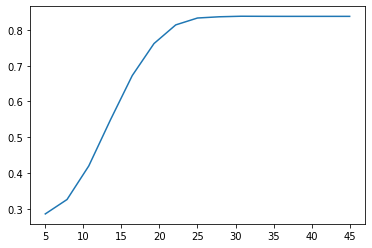

In [43]:
X_res_filtered_again = X_res_filtered.drop(columns=['inq_last_6mths','fico','int_rate','days_with_cr_line','dti','revol_util'])

#Creating the visualization again
x = np.linspace(5,45, num=15)
y = []
for i in x:
    y.append(np.mean(cross_val_score(DecisionTreeClassifier(max_depth=i,min_samples_leaf=1,min_samples_split=8,random_state=0), 
                                     X_res_filtered_again, y_res, cv=10, scoring='accuracy')))

fig, ax = plt.subplots(figsize=(6,4))
ax.plot(x,y)

Let's rank now the top 3 variables and display the cross validation score.

In [46]:
dtc = DecisionTreeClassifier(max_depth=25,min_samples_leaf=1,min_samples_split=8,random_state=0).fit(X_res_filtered_again,y_res)

pd.DataFrame({'Variable':X_res_filtered_again.columns,
              'Importance':dtc.feature_importances_}).sort_values('Importance', ascending=False).style.bar()

,Variable,Importance
0,installment,0.360696
2,revol_bal,0.359540
1,log_annual_inc,0.279764


In [48]:
np.mean(cross_val_score(DecisionTreeClassifier(max_depth=i,min_samples_leaf=1,min_samples_split=8,random_state=0), 
                                     X_res_filtered_again, y_res, cv=10, scoring='accuracy'))

0.837937192720332

#### 2.5. Final test
As a final task, let's compare the performance of the untuned algorithms with only 3 variables against them using all variables.

In [49]:
nbc = GaussianNB()
lgr = LogisticRegression()
dtc = DecisionTreeClassifier(random_state=0)
sgd = SGDClassifier(shuffle=True,random_state=0)
rfc = RandomForestClassifier(random_state=0)
knn = KNeighborsClassifier()

classifiers = [nbc, lgr, dtc, sgd, rfc, knn]
score3 = {}
for classifier in classifiers:
    score3[str(classifier)] = np.mean(cross_val_score(classifier, X_res_filtered_again, y_res, cv=10, scoring='accuracy'))


#### 2.5.1. Accuracy of untuned algorithms using only 3 variables

In [50]:
algoresults3 = pd.DataFrame.from_dict(score3,orient='index',columns=['Accuracy'])
algoresults3

,Accuracy
GaussianNB(),0.225820
LogisticRegression(),0.254774
DecisionTreeClassifier(random_state=0),0.887217
SGDClassifier(random_state=0),0.184049
RandomForestClassifier(random_state=0),0.905448
KNeighborsClassifier(),0.758115


#### 2.5.2. Accuracy of untuned algorithms using all variables

In [54]:
algoresults

,Accuracy
GaussianNB(),0.239140
LogisticRegression(),0.294197
DecisionTreeClassifier(random_state=0),0.887108
SGDClassifier(random_state=0),0.231452
"RandomForestClassifier(n_estimators=10, random_state=0)",0.899851
KNeighborsClassifier(),0.758115


## 3. Conclusions

After aplying PCA, Standardizing, evaluating the Random Forest Classifier and Decision Tree Classifier coeficients, we can conclude that the most important variables are the installment, revol_bal and log_annual_inc when determining the purpose of the loan based on the Decision Tree and Random Forests.

It is also clear that the relationships are not linear, as linear classifiers performed much worse.

In fact, if we use only those 3 variables, we have very similar performance between the untuned algorithms, specially RandomForests/DecisionTree and KNNeighbors, that presented very similar or even better performance when trained with only 3 variables.

It is also important to notice the importance of correctly Standardizing and Oversampling for the better performance of these algorithms, since the classes were very unbalanced.

#### 3.1. Future tasks

Since tree models and KNNeighbors have relatively good readability, with reduced dimensionality with 3 relevant variables only, interesting visualization of classes could be developed to showcase the differences between classes.

## 4. References and Acknowledgements

I would like to thank DataCamp for the platform and high quality content that enabled me to start studying and developing myself in the Data Science domain.

I would also like to acknowledge the Matt Harrison' book, Machine Learning Pocket Reference, that inspired important parts of this work as well.

I also would like to point out the links below for better understanding of the phik correlation coefficient:
- https://arxiv.org/abs/1811.11440
- https://towardsdatascience.com/phik-k-get-familiar-with-the-latest-correlation-coefficient-9ba0032b37e7

Another great article, this time about multiclass classification:
- https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd

### Judging Criteria
| CATEGORY | WEIGHTAGE | DETAILS                                                              |
|:---------|:----------|:---------------------------------------------------------------------|
| **Analysis** | 30%       | <ul><li>Documentation on the goal and what was included in the analysis</li><li>How the question was approached</li><li>Visualisation tools and techniques utilized</li></ul>       |
| **Results**  | 30%       | <ul><li>How the results derived related to the problem chosen</li><li>The ability to trigger potential further analysis</li></ul> |
| **Creativity** | 40% | <ul><li>How "out of the box" the analysis conducted is</li><li>Whether the publication is properly motivated and adds value</li></ul> |